<a href="https://colab.research.google.com/github/djmachine/OSS_FINAL_HOMEWORK/blob/main/OpenSource_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# 데이터 읽어오기

df_2017 = pd.read_excel('/content/def_2017.xlsx')
df_2018 = pd.read_excel('/content/def_2018.xlsx')
df_2019 = pd.read_excel('/content/def_2019.xlsx')
df_2020 = pd.read_excel('/content/def_2020.xlsx')
df_2021 = pd.read_excel('/content/def_2021.xlsx')

df_2017.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1일,3.4,-2.7,5.9,8.5,20.3,22.9,24.3,27.2,22.3,16.6,13.5,-0.6
1,2일,5.5,-1.8,2.5,9.2,20.7,20.4,26.4,29.3,22.3,19.8,14.2,1.8
2,3일,3.9,2.2,4.2,12.5,21.5,20.4,25.2,28.7,22.8,18.2,11.3,3.9
3,4일,4.6,1.8,5.9,14.7,21.0,21.1,26.1,30.0,23.3,17.8,8.1,1.2
4,5일,4.7,2.7,6.4,13.7,22.0,23.0,28.1,31.8,21.7,18.4,7.4,-3.0


In [ ]:
# 날짜열에 '일' 없애기

df_2017[0] = df_2017[0].str.replace('일','')
df_2018[0] = df_2018[0].str.replace('일','')
df_2019[0] = df_2019[0].str.replace('일','')
df_2020[0] = df_2020[0].str.replace('일','')
df_2021[0] = df_2021[0].str.replace('일','')

df_2017.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,3.4,-2.7,5.9,8.5,20.3,22.9,24.3,27.2,22.3,16.6,13.5,-0.6
1,2,5.5,-1.8,2.5,9.2,20.7,20.4,26.4,29.3,22.3,19.8,14.2,1.8
2,3,3.9,2.2,4.2,12.5,21.5,20.4,25.2,28.7,22.8,18.2,11.3,3.9
3,4,4.6,1.8,5.9,14.7,21.0,21.1,26.1,30.0,23.3,17.8,8.1,1.2
4,5,4.7,2.7,6.4,13.7,22.0,23.0,28.1,31.8,21.7,18.4,7.4,-3.0


In [ ]:
# 사용 할 새로운 데이터프레임 생성

new_df_2017 = pd.DataFrame(columns=['month','day','temp'])
new_df_2018 = pd.DataFrame(columns=['month','day','temp'])
new_df_2019 = pd.DataFrame(columns=['month','day','temp'])
new_df_2020 = pd.DataFrame(columns=['month','day','temp'])
new_df_2021 = pd.DataFrame(columns=['month','day','temp'])

In [ ]:
# 데이터를 이용해 새로운 데이터프레임에 입력
# 빈 공간이 확인됨

cnt_2017 = 0

for i in range(1,13):
  for j in range(0,len(df_2017[i].values)):
    new_df_2017.loc[cnt_2017] = [str(i), str(j+1), df_2017[i].values[j]]
    cnt_2017 += 1

cnt_2018 = 0

for i in range(1,13):
  for j in range(0,len(df_2018[i].values)):
    new_df_2018.loc[cnt_2018] = [str(i), str(j+1), df_2018[i].values[j]]
    cnt_2018 += 1

cnt_2019 = 0

for i in range(1,13):
  for j in range(0,len(df_2019[i].values)):
    new_df_2019.loc[cnt_2019] = [str(i), str(j+1), df_2019[i].values[j]]
    cnt_2019 += 1

cnt_2020 = 0

for i in range(1,13):
  for j in range(0,len(df_2020[i].values)):
    new_df_2020.loc[cnt_2020] = [str(i), str(j+1), df_2020[i].values[j]]
    cnt_2020 += 1

cnt_2021 = 0

for i in range(1,13):
  for j in range(0,len(df_2021[i].values)):
    new_df_2021.loc[cnt_2021] = [str(i), str(j+1), df_2021[i].values[j]]
    cnt_2021 += 1

for i in range(0,372):
  print(new_df_2017['month'][i]," / ",new_df_2017['day'][i]," / ",new_df_2017['temp'][i])  


1  /  1  /  3.4
1  /  2  /  5.5
1  /  3  /  3.9
1  /  4  /  4.6
1  /  5  /  4.7
1  /  6  /  6.6
1  /  7  /  4.1
1  /  8  /  7.4
1  /  9  /  3.6
1  /  10  /  -1.1
1  /  11  /  -3.1
1  /  12  /  -1.5
1  /  13  /  -3.9
1  /  14  /  -6.4
1  /  15  /  -5.8
1  /  16  /  -4.3
1  /  17  /  -2.8
1  /  18  /  0.0
1  /  19  /  -1.0
1  /  20  /  -2.7
1  /  21  /  -2.8
1  /  22  /  -5.8
1  /  23  /  -7.0
1  /  24  /  -5.3
1  /  25  /  -4.5
1  /  26  /  -1.9
1  /  27  /  -0.7
1  /  28  /  -1.0
1  /  29  /  1.3
1  /  30  /  -3.2
1  /  31  /  -4.7
2  /  1  /  -2.7
2  /  2  /  -1.8
2  /  3  /  2.2
2  /  4  /  1.8
2  /  5  /  2.7
2  /  6  /  -0.5
2  /  7  /  -0.5
2  /  8  /  -0.5
2  /  9  /  -3.7
2  /  10  /  -5.6
2  /  11  /  -3.8
2  /  12  /  -0.8
2  /  13  /  0.1
2  /  14  /  1.4
2  /  15  /  1.8
2  /  16  /  6.3
2  /  17  /  2.8
2  /  18  /  -1.2
2  /  19  /  3.0
2  /  20  /  0.4
2  /  21  /  0.5
2  /  22  /  2.4
2  /  23  /  -0.1
2  /  24  /  0.3
2  /  25  /  3.6
2  /  26  /  4.3
2  /  27  /  4.1
2

In [ ]:
# 빈 공간 제거 후 인덱스 초기화

idx_2017 = new_df_2017[new_df_2017['temp']== '\xa0'].index
new_df_2017.drop(idx_2017,inplace=True)
new_df_2017.reset_index()

idx_2018 = new_df_2018[new_df_2018['temp']== '\xa0'].index
new_df_2018.drop(idx_2018,inplace=True)
new_df_2018.reset_index()

idx_2019 = new_df_2019[new_df_2019['temp']== '\xa0'].index
new_df_2019.drop(idx_2019,inplace=True)
new_df_2019.reset_index()

idx_2020 = new_df_2020[new_df_2020['temp']== '\xa0'].index
new_df_2020.drop(idx_2020,inplace=True)
new_df_2020.reset_index()

idx_2021 = new_df_2021[new_df_2021['temp']== '\xa0'].index
new_df_2021.drop(idx_2021,inplace=True)
new_df_2021.reset_index()

new_df_2017.head(40)

,month,day,temp
0,1,1,3.4
1,1,2,5.5
2,1,3,3.9
3,1,4,4.6
4,1,5,4.7
5,1,6,6.6
6,1,7,4.1
7,1,8,7.4
8,1,9,3.6
9,1,10,-1.1


In [ ]:
# 온도 데이터 타입을 float으로 변경

new_df_2017['temp'] = pd.to_numeric(new_df_2017['temp'])
new_df_2018['temp'] = pd.to_numeric(new_df_2018['temp'])
new_df_2019['temp'] = pd.to_numeric(new_df_2019['temp'])
new_df_2020['temp'] = pd.to_numeric(new_df_2020['temp'])
new_df_2021['temp'] = pd.to_numeric(new_df_2021['temp'])

new_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 371
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   365 non-null    object 
 1   day     365 non-null    object 
 2   temp    365 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.4+ KB


In [ ]:
concat_df = pd.concat([new_df_2017,new_df_2018,new_df_2019,new_df_2020,new_df_2021])

concat_df.head()

,month,day,temp
0,1,1,3.4
1,1,2,5.5
2,1,3,3.9
3,1,4,4.6
4,1,5,4.7


In [ ]:
# 월별 평균온도

avg = concat_df.groupby('month')['temp'].mean()

print(avg)

month
1     -0.510968
10    15.261290
11     8.189333
12     0.831613
2      1.822695
3      8.250323
4     13.698000
5     19.280000
6     23.720000
7     26.812903
8     27.274194
9     21.982667
Name: temp, dtype: float64


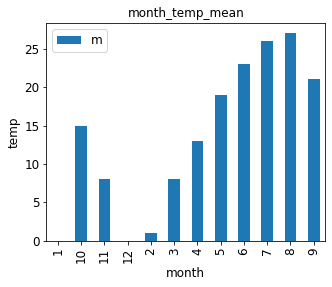

In [ ]:
temp_graph = concat_df.groupby('month')['temp'].mean().astype({'temp':int})
ax = temp_graph.plot(kind='bar', title = 'month_temp_mean', figsize = (5,4), legend = True, fontsize = 12)
ax.set_xlabel('month', fontsize = 12)
ax.set_ylabel('temp', fontsize = 12)
ax.legend('mean',fontsize = 12)

In [ ]:
result_df = pd.get_dummies(data = concat_df, columns=['month','day'])


result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 371
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp      1826 non-null   float64
 1   month_1   1826 non-null   uint8  
 2   month_10  1826 non-null   uint8  
 3   month_11  1826 non-null   uint8  
 4   month_12  1826 non-null   uint8  
 5   month_2   1826 non-null   uint8  
 6   month_3   1826 non-null   uint8  
 7   month_4   1826 non-null   uint8  
 8   month_5   1826 non-null   uint8  
 9   month_6   1826 non-null   uint8  
 10  month_7   1826 non-null   uint8  
 11  month_8   1826 non-null   uint8  
 12  month_9   1826 non-null   uint8  
 13  day_1     1826 non-null   uint8  
 14  day_10    1826 non-null   uint8  
 15  day_11    1826 non-null   uint8  
 16  day_12    1826 non-null   uint8  
 17  day_13    1826 non-null   uint8  
 18  day_14    1826 non-null   uint8  
 19  day_15    1826 non-null   uint8  
 20  day_16    1826 non-null   uint8

In [ ]:
result_df.head()

,temp,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,...,day_29,day_3,day_30,day_31,day_4,day_5,day_6,day_7,day_8,day_9
0,3.4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.9,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4.6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Text(0, 0.5, 'temp')

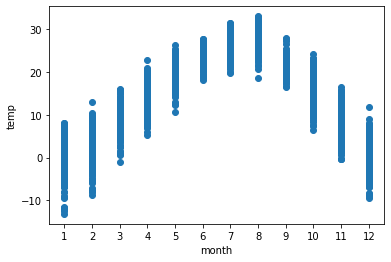

In [ ]:
x = concat_df['month']
y = concat_df['temp']
plt.plot(x,y,'o')
plt.xlabel('month')
plt.ylabel('temp')

1278 548


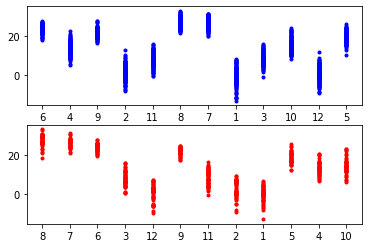

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, )
print(len(x_train),len(x_test))
fig , axes = plt.subplots(2,1)
axes[0].plot(x_train,y_train,'b.')
axes[1].plot(x_test,y_test,'r.')

In [ ]:
# 기울기와 절편
linearfitter = LinearRegression()
linearfitter.fit(x_train.values.reshape(-1,1),y_train)
[linearfitter.coef_,linearfitter.intercept_]

[array([0.69805491]), 9.83845339347168]

In [ ]:
linearfitter.score(x_train.values.reshape(-1,1),y_train)

0.05196420538538882

In [ ]:
linearfitter.score(x_test.values.reshape(-1,1),y_test)

0.010429044274199661